## Imports

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [9]:
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

## Understand The Data

In [10]:
print(df.shape[0])
print(df.shape[1])

16378
262


In [11]:
df.isnull().sum()

Property Id               0
Property Name             0
Parent Property Id        0
Parent Property Name      0
Year Ending               0
                       ... 
Longitude               730
Community Board         730
Council District        730
Census Tract            730
NTA                     730
Length: 262, dtype: int64

In [12]:
df.dtypes

Property Id               int64
Property Name            object
Parent Property Id       object
Parent Property Name     object
Year Ending              object
                         ...   
Longitude               float64
Community Board         float64
Council District        float64
Census Tract            float64
NTA                      object
Length: 262, dtype: object

In [13]:
df.describe()

,Property Id,Count of Buildings,Year Built,Number of Buildings,Occupancy,National Median ENERGY STAR Score,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,1.637800e+04,197.000000,16378.000000,16378.000000,16378.000000,16378.0,1.637800e+04,15648.000000,15648.000000,15648.000000,15648.000000,15648.000000
mean,3.614539e+06,12.730964,1950.203871,1.353157,98.717487,50.0,1.718618e+05,40.747232,-73.936541,231.011631,18.592025,7656.710251
std,1.163490e+06,13.076061,32.404250,4.146161,7.756664,0.0,4.120446e+05,0.075898,0.066959,122.906901,15.014731,21410.078016
min,7.365000e+03,1.000000,1000.000000,0.000000,0.000000,50.0,0.000000e+00,40.509037,-74.244118,101.000000,1.000000,1.000000
25%,2.721265e+06,3.000000,1927.000000,1.000000,100.000000,50.0,6.370000e+04,40.704960,-73.980492,107.000000,5.000000,113.000000
50%,3.292840e+06,9.000000,1948.000000,1.000000,100.000000,50.0,9.240000e+04,40.750628,-73.952225,207.000000,14.000000,249.000000
75%,4.594752e+06,17.000000,1970.000000,1.000000,100.000000,50.0,1.574608e+05,40.798825,-73.901150,314.000000,30.000000,809.000000
max,6.215439e+06,61.000000,2019.000000,161.000000,100.000000,50.0,2.788265e+07,40.912869,-73.700935,503.000000,51.000000,157903.000000


## Clean And Prepare The Data

In [15]:
df = df.replace({'Not Available': np.nan})

for col in list(df.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        df[col] = df[col].astype(float)

In [30]:
def missingValuesTable(df): 
    missingValues = df.isnull().sum()

    missingValuesPercentage = 100 * df.isnull().sum() / len(df)

    missingValTable = pd.concat([missingValues, missingValuesPercentage], axis=1)

    missingValTable = missingValTable.rename(columns={0: 'Missing Values', 1: 'Missing Values Percentage'})

    missingValTable = missingValTable[missingValTable.iloc[:, 1] != 0].sort_values('Missing Values Percentage', ascending=False).round(1)

    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
          "There are " + str(missingValTable.shape[0]) + " columns that have missing values.")

    return missingValTable

In [31]:
missingValuesTable(df)

Your selected dataframe has 262 columns.
There are 236 columns that have missing values.


,Missing Values,Missing Values Percentage
Kerosene Use (kBtu),16378,100.0
% Difference from National Median Water/Wastewater Source EUI,16378,100.0
Convention Center - Gross Floor Area (ft²),16378,100.0
CoStar Property ID,16378,100.0
% Difference from National Median Water/Wastewater Site EUI,16378,100.0
...,...,...
Largest Property Use Type,11,0.1
Primary Property Type - Portfolio Manager-Calculated,11,0.1
Property GFA - Calculated (Buildings and Parking) (ft²),9,0.1
Property GFA - Calculated (Buildings) (ft²),8,0.0


## Exploratory Data Analysis

Text(0.5, 1.0, 'Energy Star Score Distribution')

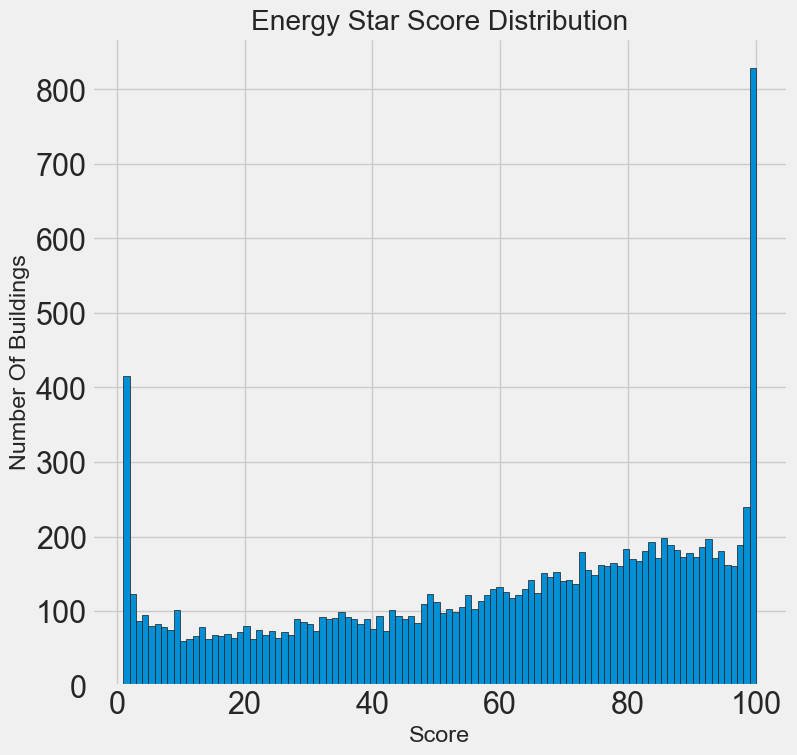

In [39]:
plt.figure(figsize(8,8))

df = df.rename(columns = {'ENERGY STAR Score': 'score'})

plt.style.use('fivethirtyeight')

plt.hist(df['score'].dropna(), bins= 100, edgecolor = 'k')

plt.xlabel('Score')
plt.ylabel('Number Of Buildings')
plt.title('Energy Star Score Distribution')

Text(0.5, 1.0, 'Site EUI Distribution')

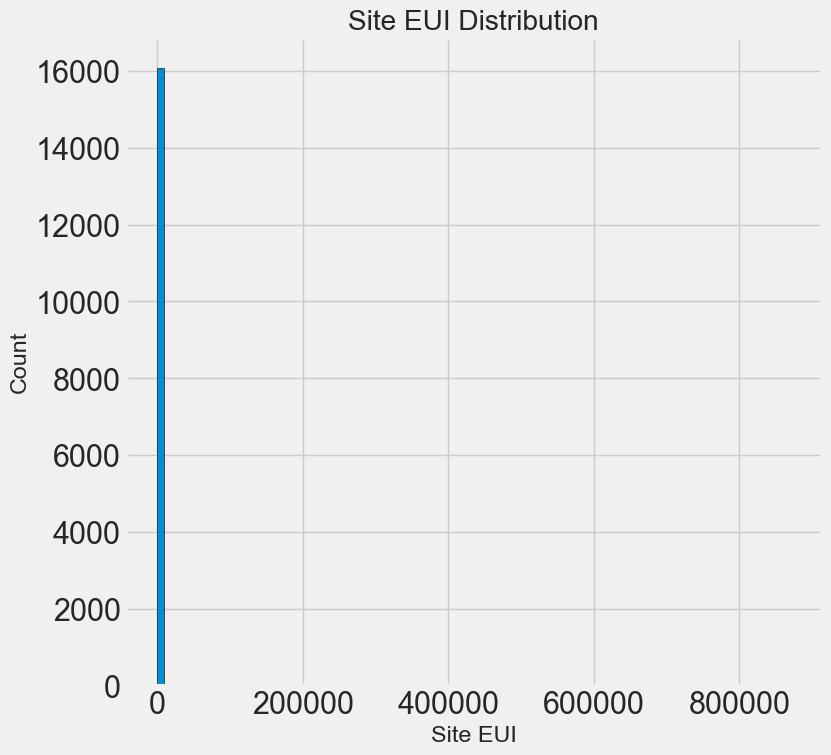

In [42]:
plt.figure(figsize(8,8))

plt.hist((df['Site EUI (kBtu/ft²)']).dropna(), bins = 100, edgecolor = 'k')

plt.xlabel('Site EUI');
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [43]:
df['Site EUI (kBtu/ft²)'].describe()

count     16095.000000
mean        228.991028
std        7300.206821
min           0.000000
25%          60.300000
50%          78.200000
75%         100.250000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [44]:
df['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

14058     51328.8
14056     51831.2
2889      78360.1
3102      84969.6
16035     95560.2
3101     103562.7
3100     112173.6
16376    126307.4
9681     143974.4
1635     869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [45]:
df.loc[df['Site EUI (kBtu/ft²)'] == 869265, :]

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Count of Buildings,Address 1,Address 2,City,County,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,National Median ENERGY STAR Score,...,Water Current Date,Water Use (All Water Sources) (kgal),Indoor Water Use (All Water Sources) (kgal),Indoor Water Use Intensity (All Water Sources) (gal/ft²),Outdoor Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Mixed Indoor/Outdoor Use (kgal),Municipally Supplied Potable Water - Indoor Use (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Municipally Supplied Potable Water - Outdoor Use (kgal),Third Party Certification Date Anticipated,Third Party Certification,Third Party Certification Date Achieved,"Supermarket/Grocery - Open or Closed Refrigeration Density (Number per 1,000 ft²)",Convenience Store With Gas Station - Number of Open or Closed Refrigeration/Freezer Units,"Convenience Store With Gas Station - Open or Closed Refrigeration Density (Number per 1,000 ft²)","Financial Office - Computer Density (Number per 1,000 ft²)","Senior Care Community - Living Unit Density (Number per 1,000 ft²)",Source EUI (kBtu/ft²),% Difference from National Median Water/Wastewater Source EUI,Source EUI - Adjusted to Current Year (kBtu/ft²),"Office - Computer Density (Number per 1,000 ft²)",Generation Date,Release Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
1635,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2016,3028937502,"3390250 , 3338313",NaN,234 Skillman avenue,NaN,Bronx,NaN,11211,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,Multifamily Housing,56900.0,NaN,NaN,NaN,NaN,2004,1,90,Whole Building,NaN,1.0,50.0,...,12/31/2016,2547.9,2547.9,44.78,NaN,NaN,2547.9,44.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,912801.1,NaN,912801.1,NaN,05/01/2017 11:33:49 PM,05/01/2017 11:34:14 PM,BROOKLYN,40.716233,-73.94141,301.0,34.0,477.0,East Williamsburg


In [46]:
first_quartile = df['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = df['Site EUI (kBtu/ft²)'].describe()['75%']

iqr = third_quartile - first_quartile

df = df[(df['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (df['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

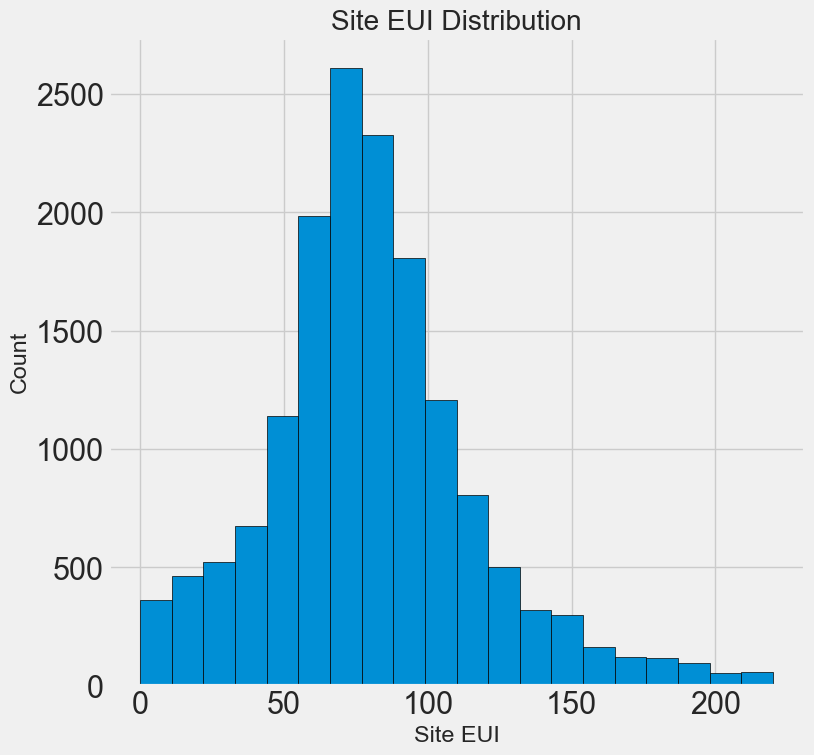

In [48]:
figsize(8, 8)
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution');

## Looking for Relationships